# 📘 Restaurant Chains Data Analysis — Practice Notebook

This notebook contains hands-on exercises to analyze restaurant chains using Python, Pandas, Seaborn, and Matplotlib.

### 📂 Dataset Assumption:
The dataset contains the following columns:
- `restaurant_name`
- `location`
- `votes`
- `aggregate_rating`
- `cuisines`
- `cost_for_two`

---

### 🧠 Basic Level

1. **Load the dataset** using Pandas and display the first 5 rows.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
data = {
    'restaurant_name': np.random.choice(
        ['McDonalds', 'KFC', 'Dominos', 'Starbucks', 'Pizza Hut', 
         'Burger King', 'Subway', 'Cafe Coffee Day', 
         'Barbeque Nation', 'Wow Momo', 'Local Diner', "Joe's Grill"], 
        200,
        p=[0.15, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.025, 0.025]
    ),
    'location': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], 200),
    'votes': np.random.randint(10, 1000, 200),
    'aggregate_rating': np.round(np.random.uniform(3.0, 5.0, 200), 1),
    'cuisines': np.random.choice(['American', 'Italian', 'Mexican', 'Indian', 'Chinese', 'Japanese'], 200),
    'cost_for_two': np.random.randint(20, 150, 200)
}

df = pd.DataFrame(data)
df.to_csv("restaurant_chains.csv", index=False)
print(df.head())


  restaurant_name  location  votes  aggregate_rating  cuisines  cost_for_two
0         Dominos   Houston    426               3.9  Japanese           111
1     Local Diner   Chicago    177               4.6  Japanese            50
2          Subway  New York    851               5.0  Japanese           141
3       Pizza Hut   Houston     52               4.1  American            70
4             KFC   Houston    565               3.6   Mexican            48


2. How many **unique restaurants** are present in the dataset?

In [12]:
unique_restaurants = df['restaurant_name'].nunique()
print(f"Unique restaurants: {unique_restaurants}")


Unique restaurants: 12


3. Find the **top 10 most frequently occurring** restaurant names.

In [16]:
top_10 = df['restaurant_name'].value_counts().head(10)
print(top_10)



restaurant_name
Dominos            34
McDonalds          33
KFC                23
Pizza Hut          20
Burger King        18
Subway             18
Starbucks          12
Barbeque Nation    12
Wow Momo           11
Cafe Coffee Day    11
Name: count, dtype: int64


4. How many restaurants have a rating **greater than 4.0**?

In [19]:
high_rating_count = df[df['aggregate_rating'] > 4.0].shape[0]
print(f"Restaurants with rating > 4.0: {high_rating_count}")




Restaurants with rating > 4.0: 93


5. Display the count of restaurants by **location** using a bar chart.

location
Houston        44
Phoenix        42
Los Angeles    41
New York       40
Chicago        33
Name: count, dtype: int64


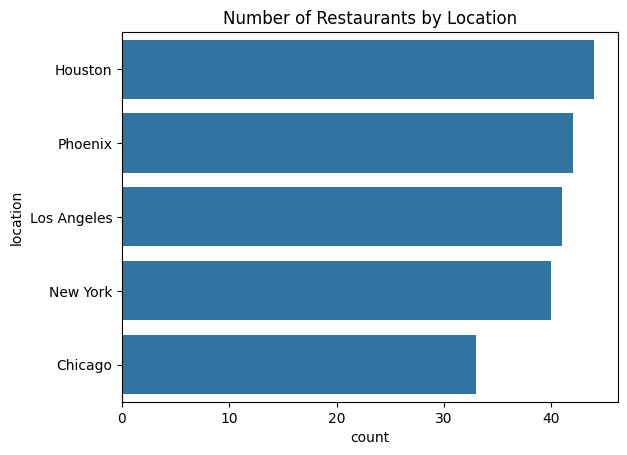

In [21]:
location_counts = df['location'].value_counts()
print(location_counts)

sns.countplot(y='location', data=df, order=location_counts.index)
plt.title("Number of Restaurants by Location")
plt.show()



### 📊 Intermediate Level

6. Identify restaurant **chains** (names that appear more than 3 times).

In [23]:
chains = df['restaurant_name'].value_counts()
chains = chains[chains > 3]
print(chains)



restaurant_name
Dominos            34
McDonalds          33
KFC                23
Pizza Hut          20
Burger King        18
Subway             18
Starbucks          12
Barbeque Nation    12
Wow Momo           11
Cafe Coffee Day    11
Local Diner         6
Name: count, dtype: int64


7. Create a new DataFrame of only **chain restaurants**.

In [25]:
chain_names = chains.index
chain_df = df[df['restaurant_name'].isin(chain_names)]
print(chain_df.head())



  restaurant_name  location  votes  aggregate_rating  cuisines  cost_for_two
0         Dominos   Houston    426               3.9  Japanese           111
1     Local Diner   Chicago    177               4.6  Japanese            50
2          Subway  New York    851               5.0  Japanese           141
3       Pizza Hut   Houston     52               4.1  American            70
4             KFC   Houston    565               3.6   Mexican            48


8. For each chain, calculate the **average aggregate rating**.

In [27]:
avg_rating = chain_df.groupby('restaurant_name')['aggregate_rating'].mean().sort_values(ascending=False)
print(avg_rating)



restaurant_name
Subway             4.150000
Pizza Hut          4.110000
Starbucks          4.100000
Cafe Coffee Day    4.009091
Dominos            3.994118
Barbeque Nation    3.966667
KFC                3.960870
Local Diner        3.950000
McDonalds          3.924242
Burger King        3.816667
Wow Momo           3.681818
Name: aggregate_rating, dtype: float64


9. For each chain, calculate the **total number of votes** received.

In [29]:
total_votes = chain_df.groupby('restaurant_name')['votes'].sum().sort_values(ascending=False)
print(total_votes)



restaurant_name
Dominos            17851
McDonalds          17102
KFC                12278
Burger King         9556
Subway              8039
Pizza Hut           7617
Barbeque Nation     6577
Cafe Coffee Day     5946
Wow Momo            4783
Starbucks           4402
Local Diner         1775
Name: votes, dtype: int32


10. Visualize the **top 5 chains** with the highest average rating using a **Seaborn bar plot**.

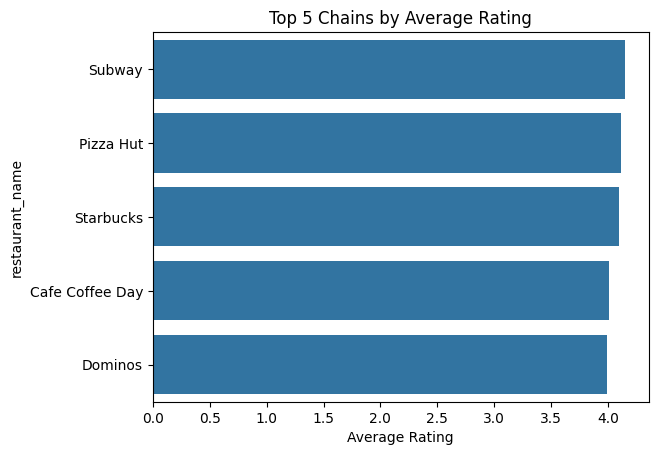

In [32]:
top_5_avg_rating = avg_rating.head(5)

sns.barplot(x=top_5_avg_rating.values, y=top_5_avg_rating.index)
plt.title("Top 5 Chains by Average Rating")
plt.xlabel("Average Rating")
plt.show()



### 📈 Advanced Level

11. Compare the **popularity (votes)** of top 5 chains **across locations** using a grouped bar chart.

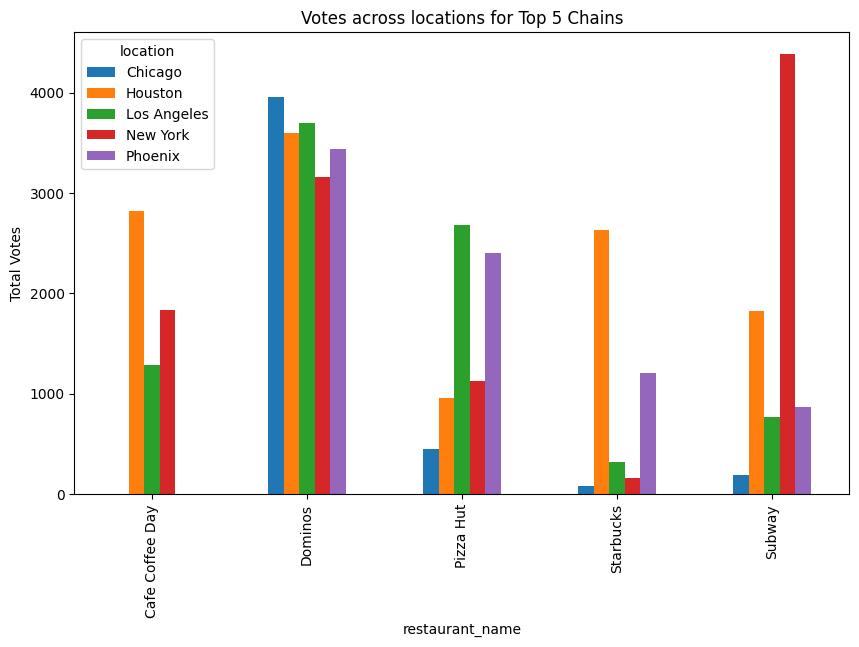

In [34]:
top_5_chains = top_5_avg_rating.index

grouped_votes = chain_df[chain_df['restaurant_name'].isin(top_5_chains)]
grouped = grouped_votes.groupby(['restaurant_name', 'location'])['votes'].sum().unstack().fillna(0)

grouped.plot(kind='bar', figsize=(10,6))
plt.title("Votes across locations for Top 5 Chains")
plt.ylabel("Total Votes")
plt.show()



12. Plot a **boxplot** showing the distribution of ratings for the top 5 chains.

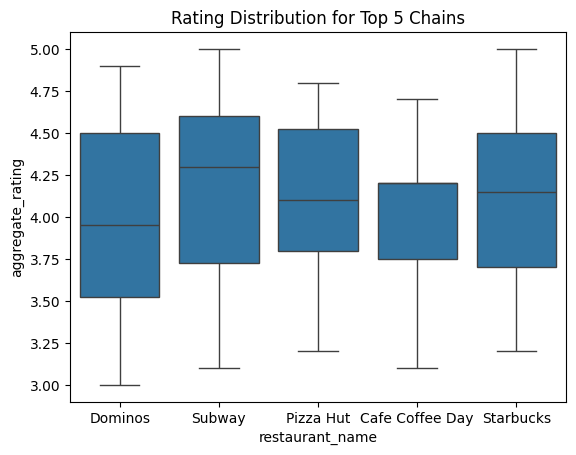

In [36]:
sns.boxplot(x='restaurant_name', y='aggregate_rating', data=grouped_votes)
plt.title("Rating Distribution for Top 5 Chains")
plt.show()



13. Which locations have the **highest number of high-rated chain restaurants** (rating > 4.2)?

In [38]:
high_rated = chain_df[chain_df['aggregate_rating'] > 4.2]
high_rated_counts = high_rated['location'].value_counts()
print(high_rated_counts)


location
New York       16
Los Angeles    15
Phoenix        13
Houston        10
Chicago         9
Name: count, dtype: int64


14. Find the **average cost for two** for each chain. Sort in descending order.

In [40]:
avg_cost = chain_df.groupby('restaurant_name')['cost_for_two'].mean().sort_values(ascending=False)
print(avg_cost)



restaurant_name
Starbucks          96.916667
Cafe Coffee Day    95.545455
Burger King        91.111111
Subway             89.888889
Pizza Hut          87.300000
Dominos            81.352941
Wow Momo           79.090909
McDonalds          79.000000
Barbeque Nation    77.583333
KFC                74.826087
Local Diner        61.833333
Name: cost_for_two, dtype: float64


15. Create a final summary table of top 5 chains including:
   - Number of outlets
   - Average rating
   - Total votes
   - Average cost for two

In [42]:
summary = pd.DataFrame({
    'Number of Outlets': chain_df.groupby('restaurant_name').size(),
    'Average Rating': chain_df.groupby('restaurant_name')['aggregate_rating'].mean(),
    'Total Votes': chain_df.groupby('restaurant_name')['votes'].sum(),
    'Average Cost for Two': chain_df.groupby('restaurant_name')['cost_for_two'].mean()
})

top5_summary = summary.loc[top_5_chains]
print(top5_summary)


                 Number of Outlets  Average Rating  Total Votes  \
restaurant_name                                                   
Subway                          18        4.150000         8039   
Pizza Hut                       20        4.110000         7617   
Starbucks                       12        4.100000         4402   
Cafe Coffee Day                 11        4.009091         5946   
Dominos                         34        3.994118        17851   

                 Average Cost for Two  
restaurant_name                        
Subway                      89.888889  
Pizza Hut                   87.300000  
Starbucks                   96.916667  
Cafe Coffee Day             95.545455  
Dominos                     81.352941  
